In [33]:
#import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [34]:
#read and display head

df = pd.read_csv("House Price Prediction Dataset.csv")

df.head(7)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
5,6,3944,1,2,1,1906,Urban,Poor,No,93262
6,7,3671,1,1,2,1948,Rural,Poor,Yes,448722


In [35]:
#general info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [36]:
#missing values

print(df.isna().sum())

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [37]:
#duplicate rows

df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

In [38]:
#describe/stats

df.describe(include='all')

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000,2000,2000,2000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,4,4,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Downtown,Fair,No,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,558,521,1038,NaN
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,NaN,NaN,NaN,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,NaN,NaN,NaN,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,NaN,NaN,NaN,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,NaN,NaN,NaN,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,NaN,NaN,NaN,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,NaN,NaN,NaN,780086.000000


In [39]:
#column review

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

Numeric columns: ['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price']
Categorical columns: ['Location', 'Condition', 'Garage']


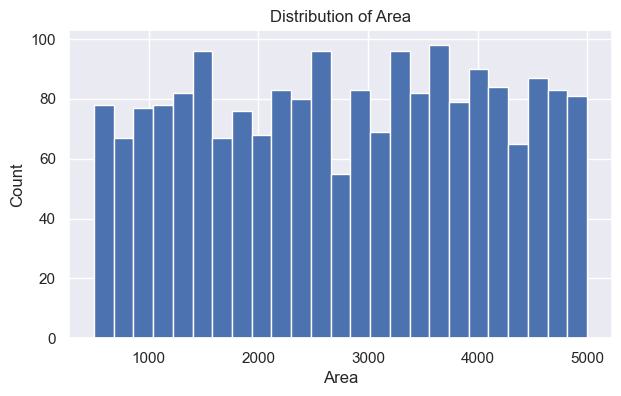

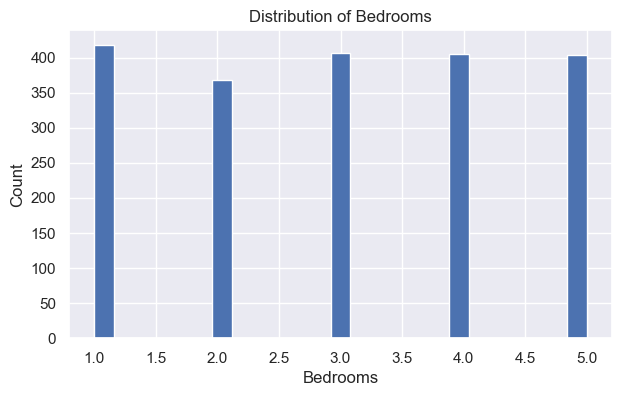

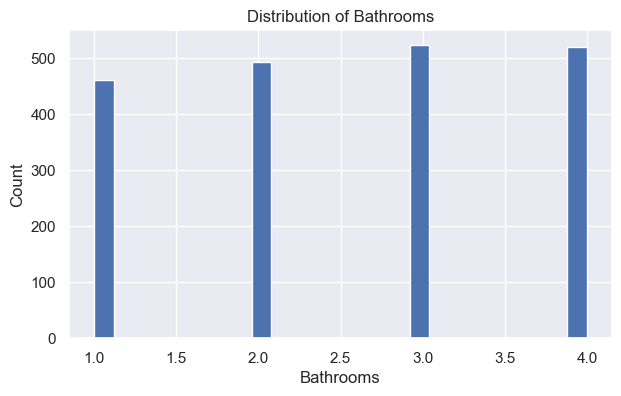

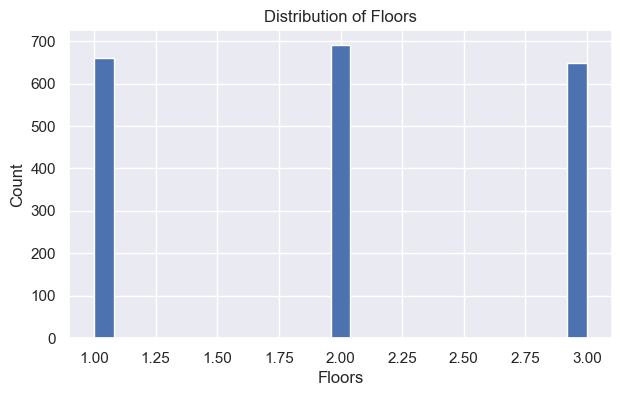

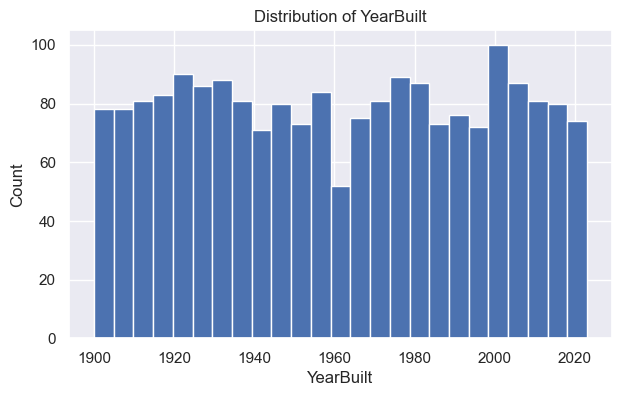

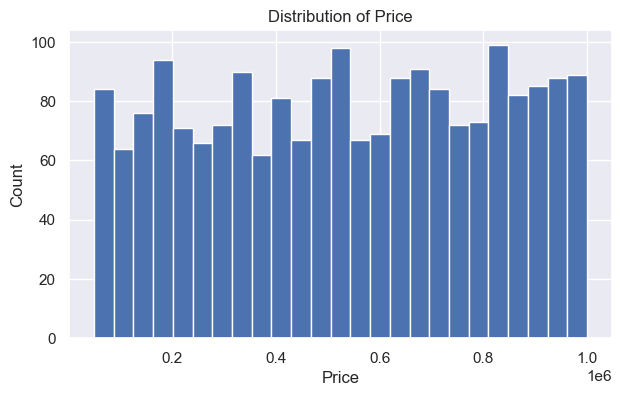

In [40]:
#column histograms

for col in num_cols:
    if col.lower() == "id":
        continue
    plt.figure(figsize=(7,4))
    plt.hist(df[col].dropna(), bins=25)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

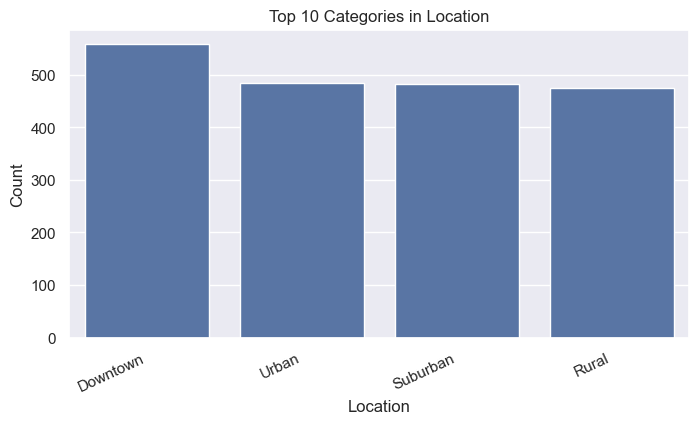

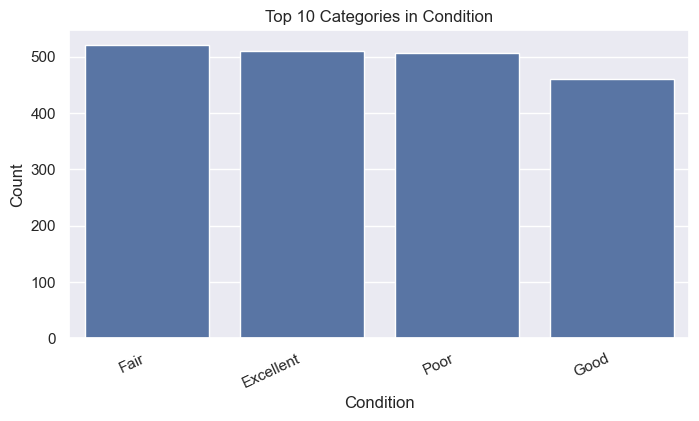

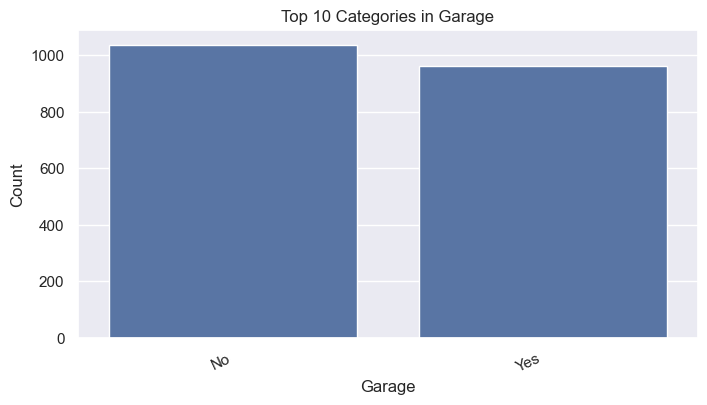

In [41]:
#categorical bar graphs

for col in cat_cols:
    if col.lower() == "id":
        continue
    
    plt.figure(figsize=(8,4))
    top = df[col].value_counts().head(10)  # keep it readable
    sns.barplot(x=top.index, y=top.values)
    plt.title(f"Top 10 Categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=25, ha="right")
    plt.show()

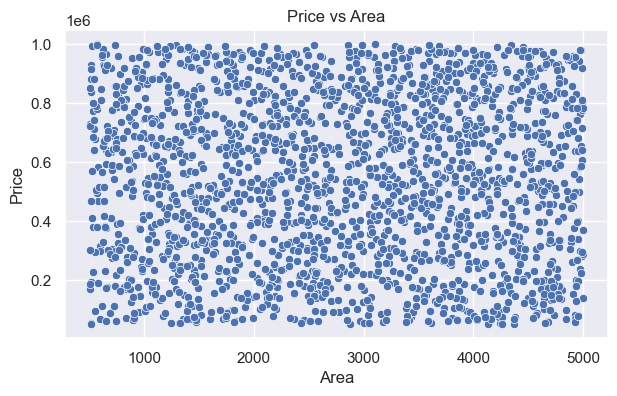

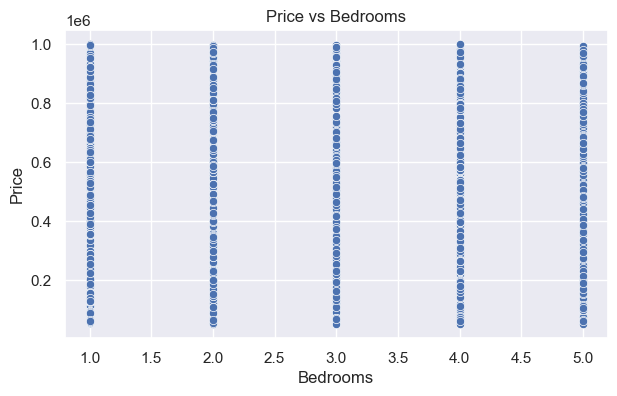

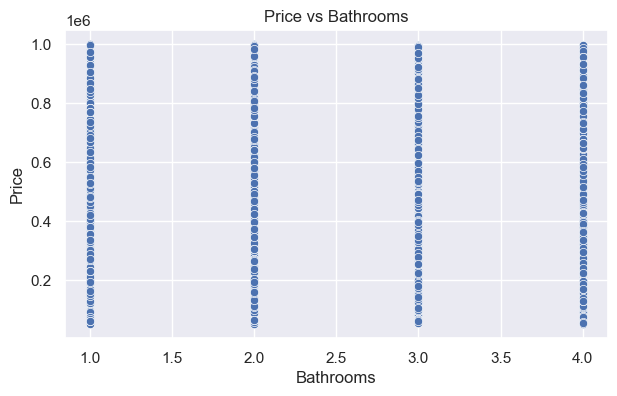

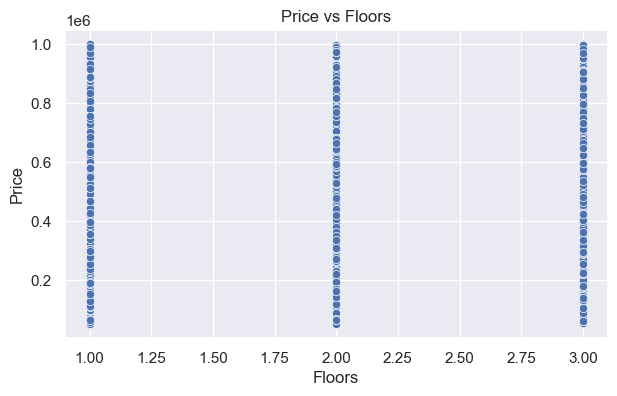

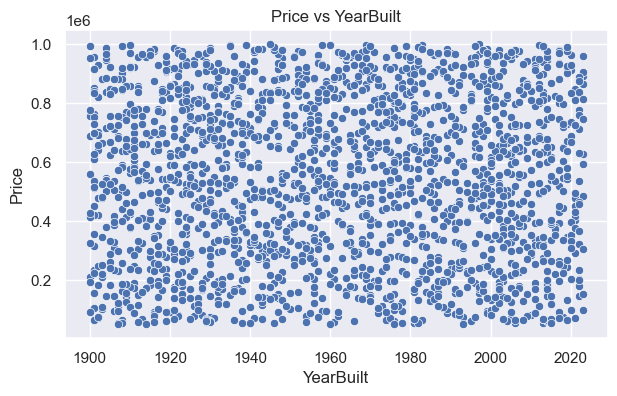

In [42]:
#bivariate analysis
#scatterplots
#price by numerical features

target = "Price"

for col in num_cols:
    if col in [target, "Id", "id"]:
        continue
    
    plt.figure(figsize=(7,4))
    sns.scatterplot(data=df, x=col, y=target)
    plt.title(f"{target} vs {col}")
    plt.show()

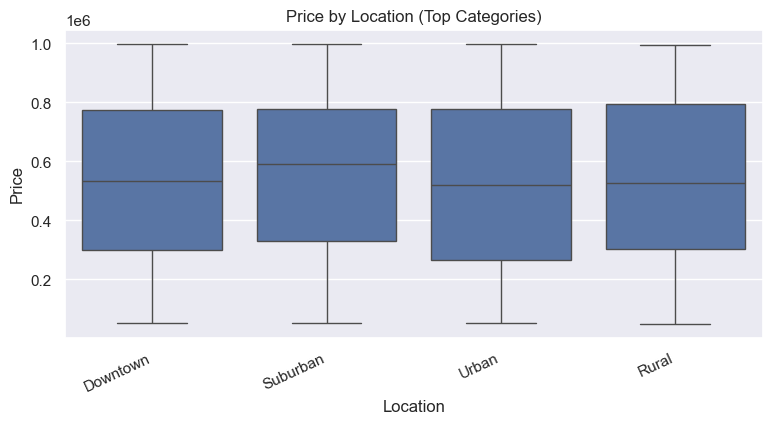

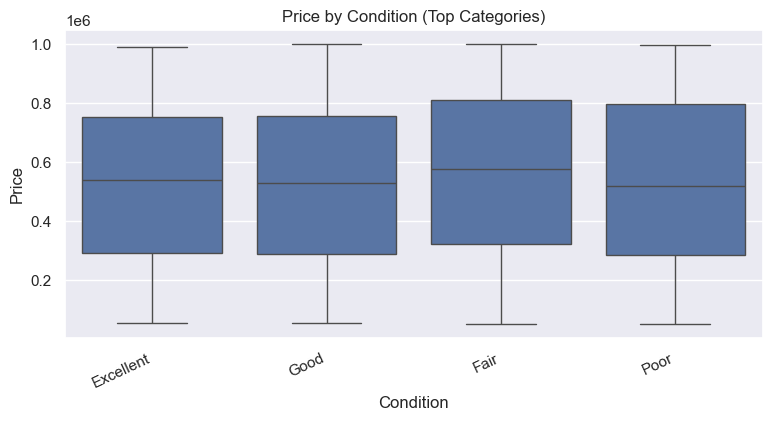

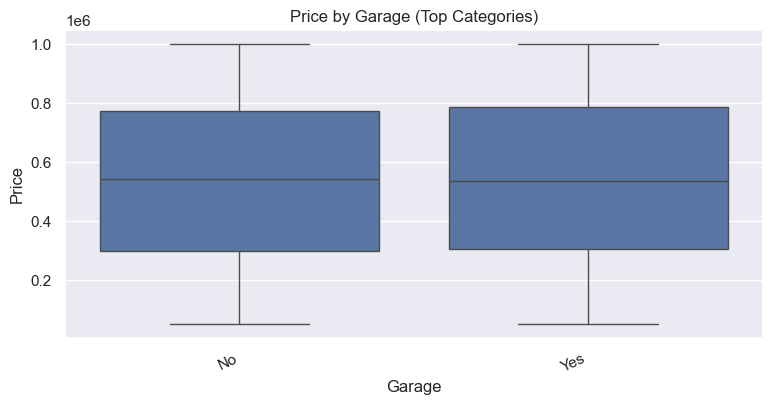

In [43]:
#boxplots
#price by categorical features

for col in cat_cols:
    if col.lower() == "id":
        continue
    
    plt.figure(figsize=(9,4))
    top_cats = df[col].value_counts().head(8).index
    sns.boxplot(data=df[df[col].isin(top_cats)], x=col, y=target)
    plt.title(f"{target} by {col} (Top Categories)")
    plt.xticks(rotation=25, ha="right")
    plt.show()

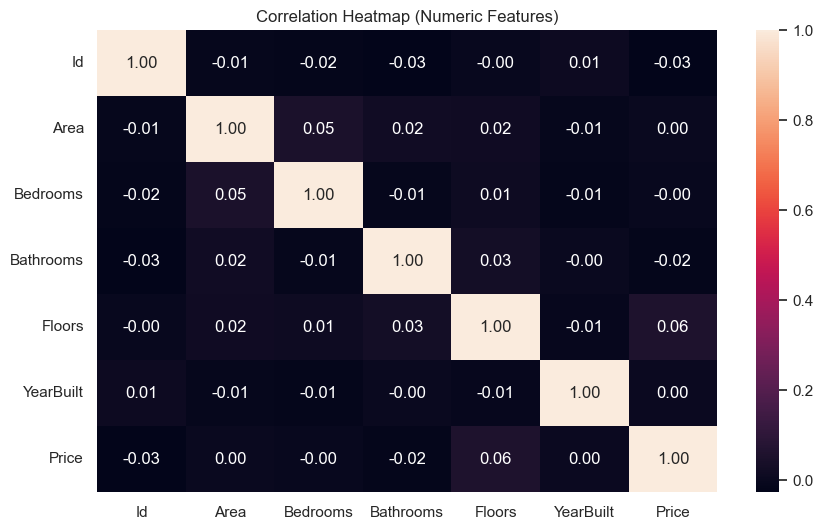

In [44]:
#correlation matrix/heatmap

plt.figure(figsize=(10,6))
corr = df[num_cols].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [45]:
#average price by feature

summary = {
    "Location": df.groupby("Location")["Price"].mean(),
    "Condition": df.groupby("Condition")["Price"].mean(),
    "Garage": df.groupby("Garage")["Price"].mean(),
    "Bedrooms": df.groupby("Bedrooms")["Price"].mean(),
    "Floors": df.groupby("Floors")["Price"].mean()
}

for key, value in summary.items():
    print("\n", key)
    print(value)


 Location
Location
Downtown    536059.661290
Rural       538613.943038
Suburban    557416.333333
Urban       518963.548454
Name: Price, dtype: float64

 Condition
Condition
Excellent    530812.009785
Fair         560594.140115
Good         529002.351410
Poor         528933.218935
Name: Price, dtype: float64

 Garage
Garage
No     536920.700385
Yes    538492.747401
Name: Price, dtype: float64

 Bedrooms
Bedrooms
1    530561.622010
2    545546.521739
3    546977.894089
4    533696.930864
5    532500.124069
Name: Price, dtype: float64

 Floors
Floors
1    520413.978820
2    534537.396527
3    558633.841049
Name: Price, dtype: float64


In [46]:
#pivot table

pd.pivot_table(
    df,
    values="Price",
    index="Location",
    columns="Condition",
    aggfunc="mean"
)

Condition,Excellent,Fair,Good,Poor
Location,,,,
Downtown,524477.967320,584624.766423,510704.191176,525203.022727
Rural,547966.141667,579754.727273,500956.690000,515768.680328
Suburban,553103.377049,562783.795276,570986.252252,543906.186992
Urban,497976.370690,511798.304000,534554.131579,530908.484615
